<a href="https://colab.research.google.com/github/OIBSIP-25-26/PROJECT1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#==========================
#Step0:ImportLibraries
#==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#==========================
#Step1:Load&CleanData
#==========================
df=pd.read_csv("Retail and wherehouse Sale.csv")
print("Dataset Shape:",df.shape)
print("\nData Types:\n",df.dtypes)
print("\nMissing Values:\n",df.isnull().sum())
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        df[col]=df[col].fillna(df[col].median())
    else:
        df[col]=df[col].fillna(df[col].mode()[0])
if "Date" in df.columns:
    df["Date"]=pd.to_datetime(df["Date"],errors="coerce")
print("\nSample Data:\n",df.head())

Dataset Shape: (30000, 9)

 Data Type s:
 YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

 Missing Values: 
 YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

 Sample Data: 
    YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL

In [ ]:
# ==========================
# Step 2: Descriptive Statistics
# ==========================
print("\nDescriptive Stats:\n", df.describe())

# Retail Sales
if "RETAIL SALES" in df.columns:
    print("Average Retail Sales:", df["RETAIL SALES"].mean())
    print("Median Retail Sales:", df["RETAIL SALES"].median())
    print("Mode Retail Sales:", df["RETAIL SALES"].mode()[0])


Descriptive Stats:
           YEAR         MONTH  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count  30000.0  30000.000000  30000.000000      30000.000000     30000.000000
mean    2020.0      3.911467      6.939570          6.594058        27.431031
std        0.0      2.836788     33.080526         27.879428       272.166085
min     2020.0      1.000000     -0.420000         -6.000000     -3999.000000
25%     2020.0      1.000000      0.000000          0.000000         0.000000
50%     2020.0      3.000000      0.160000          0.000000         1.000000
75%     2020.0      7.000000      2.920000          3.000000         6.000000
max     2020.0      9.000000   2739.000000       1507.000000     18317.000000
Average Retail Sales: 6.93957
Median Retail Sales: 0.16
Mode Retail Sales: 0.0


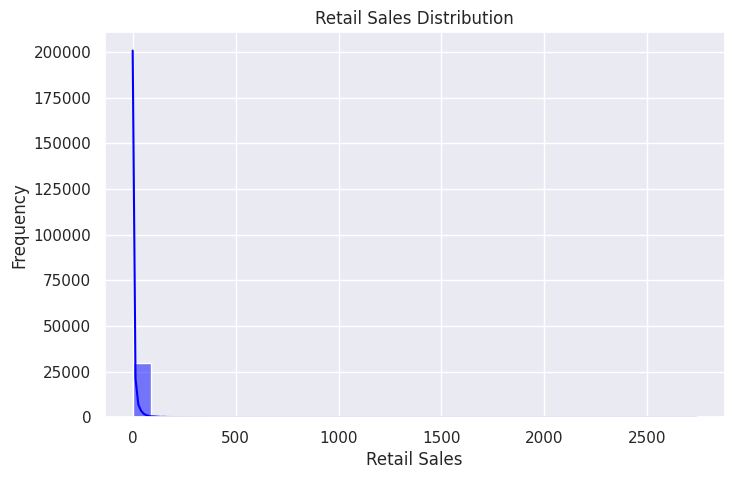

In [ ]:
 # Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["RETAIL SALES"], bins=30, kde=True, color="blue")
plt.title("Retail Sales Distribution")
plt.xlabel("Retail Sales")
plt.ylabel("Frequency")
plt.show()

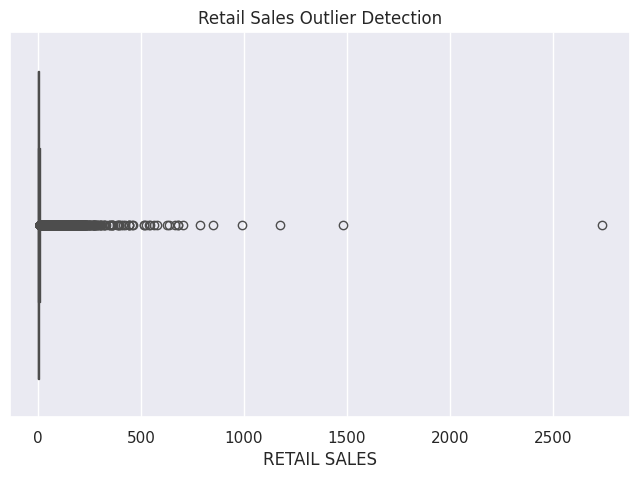

In [ ]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["RETAIL SALES"], color="orange")
plt.title("Retail Sales Outlier Detection")
plt.show()

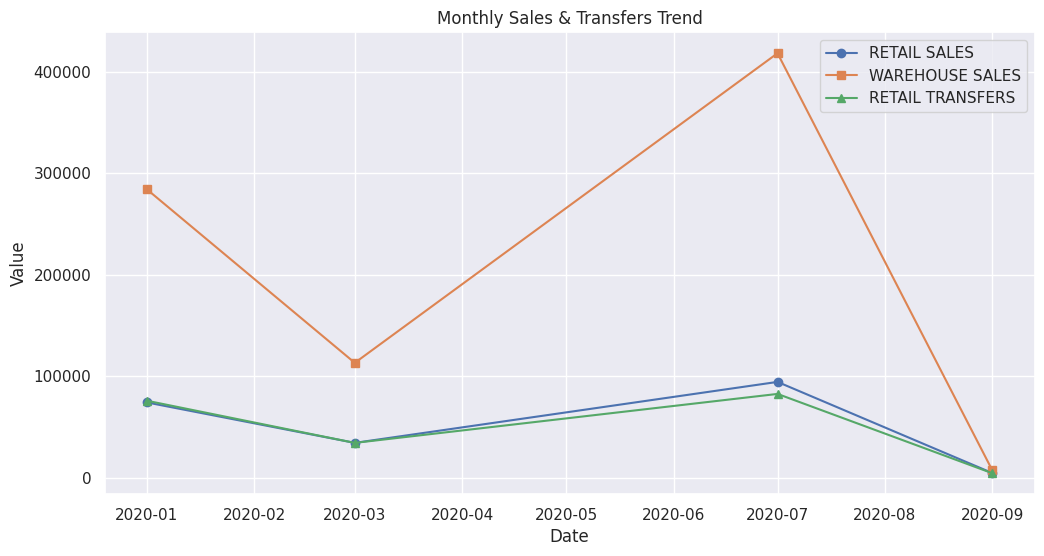

In [ ]:
# ==========================
# Step 3: Time Series Analysis (Google Colab)
# ==========================
# If your data already has YEAR and MONTH columns, create Date column
if "Date" not in df.columns:
    df["Date"] = pd.to_datetime(df["YEAR"].astype(str) + "-" + df["MONTH"].astype(str) + "-01")
# Aggregate monthly data
monthly_retail = df.groupby("Date")["RETAIL SALES"].sum()
monthly_warehouse = df.groupby("Date")["WAREHOUSE SALES"].sum()
monthly_transfers = df.groupby("Date")["RETAIL TRANSFERS"].sum()
# Line plot trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_retail.index, monthly_retail.values, marker="o", label="RETAIL SALES")
plt.plot(monthly_warehouse.index, monthly_warehouse.values, marker="s", label="WAREHOUSE SALES")
plt.plot(monthly_transfers.index, monthly_transfers.values, marker="^", label="RETAIL TRANSFERS")
plt.title("Monthly Sales & Transfers Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

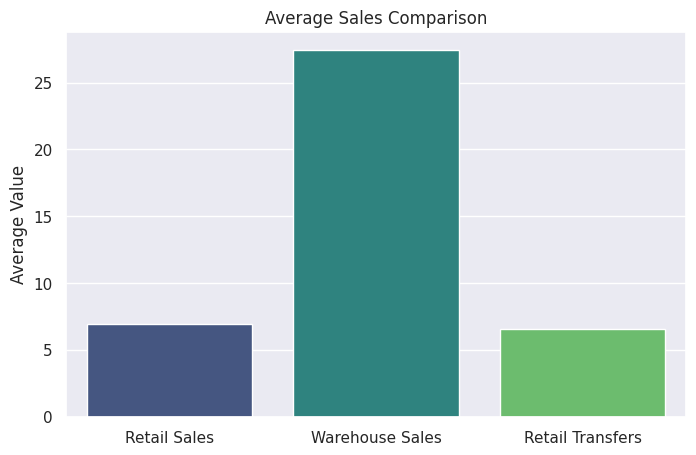

In [ ]:
# ==========================
# Step 4: Comparative Analysis
# ==========================
# Compare average across sales types
avg_values = pd.DataFrame({
    "Sales Type": ["Retail Sales", "Warehouse Sales", "Retail Transfers"],
    "Average Value": [
        df["RETAIL SALES"].mean(),
        df["WAREHOUSE SALES"].mean(),
        df["RETAIL TRANSFERS"].mean()]
})
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_values, x="Sales Type", y="Average Value", hue="Sales Type", palette="viridis", legend=False)
plt.title("Average Sales Comparison")
plt.ylabel("Average Value")
plt.xlabel("")
plt.show()


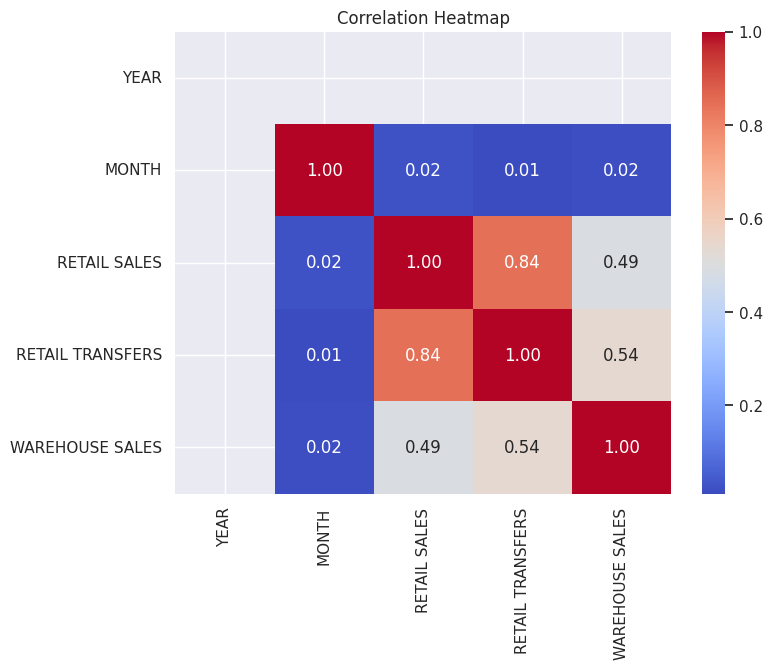

In [ ]:
# ==========================
# Step 5: Correlation & Heatmap
# ==========================
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

📌 Insights & Recommendations:
- Retail Sales show strong seasonality; plan inventory before peak months.
- Warehouse Sales fluctuate more; optimize stock allocation between warehouses.
- Retail Transfers may indicate shifting demand between stores → balance inventory.
- Strong correlations suggest interdependence; use these to forecast future demand.
- Monitor negative outliers (loss/returns) to minimize operational issues.